# TODO LIST Selasa, 28 Juni 2022

- [x] Dataset nya banyak yg duplicate brooo, ampas kali lah
- [x] Drop columns yang gk penting
- [x] Lanjutin EDA
- [x] "Recommender System" based on popularity
- [ ] Markicob pake riil recommender system

# Anime Recommendation for Wibu

by: shandytp

referensi bacaan : https://medium.com/crunchyroll/scaling-up-anime-with-machine-learning-and-smart-real-time-algorithms-2fb706ec56c0

titip: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

### Import Library 

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn

wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)

### Dataset Source
[Anime Dataset with Reviews - MyAnimeList](https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews)

This dataset contains:

`- animes.csv`

`- reviews.csv`

`- profiles.csv`

In [2]:
DATA_PATH = 'data/'

In [3]:
data_anime = pd.read_csv(DATA_PATH + 'animes.csv')
data_review = pd.read_csv(DATA_PATH + 'reviews.csv')

In [4]:
print(data_anime.shape)
print(data_review.shape)

(19311, 12)
(192112, 7)


In [5]:
data_anime.head().T

,0,1,2,3,4
uid,28891,23273,34599,5114,31758
title,Haikyuu!! Second Season,Shigatsu wa Kimi no Uso,Made in Abyss,Fullmetal Alchemist: Brotherhood,Kizumonogatari III: Reiketsu-hen
synopsis,Following their participation at the Inter-Hig...,Music accompanies the path of the human metron...,The Abyss—a gaping chasm stretching down into ...,"""In order for something to be obtained, someth...",After helping revive the legendary vampire Kis...
genre,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Drama', 'Music', 'Romance', 'School', 'Shoun...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Action', 'Military', 'Adventure', 'Comedy', ...","['Action', 'Mystery', 'Supernatural', 'Vampire']"
aired,"Oct 4, 2015 to Mar 27, 2016","Oct 10, 2014 to Mar 20, 2015","Jul 7, 2017 to Sep 29, 2017","Apr 5, 2009 to Jul 4, 2010","Jan 6, 2017"
episodes,25.0,22.0,13.0,64.0,1.0
members,489888,995473,581663,1615084,214621
popularity,141,28,98,4,502
ranked,25.0,24.0,23.0,1.0,22.0
score,8.82,8.83,8.83,9.23,8.83


In [6]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
text,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."
link,https://myanimelist.net/reviews.php?id=255938,https://myanimelist.net/reviews.php?id=259117,https://myanimelist.net/reviews.php?id=253664,https://myanimelist.net/reviews.php?id=8254,https://myanimelist.net/reviews.php?id=291149


In [7]:
data_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [8]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


## Process the Data

### Drop columns yang gak kepake 

In [9]:
data_anime = data_anime.drop(['synopsis', 'img_url', 'link'], axis=1)

In [10]:
data_anime.head().T

,0,1,2,3,4
uid,28891,23273,34599,5114,31758
title,Haikyuu!! Second Season,Shigatsu wa Kimi no Uso,Made in Abyss,Fullmetal Alchemist: Brotherhood,Kizumonogatari III: Reiketsu-hen
genre,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Drama', 'Music', 'Romance', 'School', 'Shoun...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Action', 'Military', 'Adventure', 'Comedy', ...","['Action', 'Mystery', 'Supernatural', 'Vampire']"
aired,"Oct 4, 2015 to Mar 27, 2016","Oct 10, 2014 to Mar 20, 2015","Jul 7, 2017 to Sep 29, 2017","Apr 5, 2009 to Jul 4, 2010","Jan 6, 2017"
episodes,25.0,22.0,13.0,64.0,1.0
members,489888,995473,581663,1615084,214621
popularity,141,28,98,4,502
ranked,25.0,24.0,23.0,1.0,22.0
score,8.82,8.83,8.83,9.23,8.83


In [11]:
data_review = data_review.drop(['link', 'text'], axis=1)

In [12]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."


### Strip `genre` columns 

In [13]:
data_anime['genre']

0        ['Comedy', 'Sports', 'Drama', 'School', 'Shoun...
1        ['Drama', 'Music', 'Romance', 'School', 'Shoun...
2        ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...
3        ['Action', 'Military', 'Adventure', 'Comedy', ...
4         ['Action', 'Mystery', 'Supernatural', 'Vampire']
                               ...                        
19306           ['Sci-Fi', 'Adventure', 'Comedy', 'Magic']
19307    ['Adventure', 'Fantasy', 'Magic', 'Martial Art...
19308                ['Mystery', 'Horror', 'Supernatural']
19309    ['Action', 'Adventure', 'Comedy', 'Historical'...
19310    ['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']
Name: genre, Length: 19311, dtype: object

In [14]:
data_anime['genre'] = data_anime['genre'].str.strip('[]').astype(str)

In [15]:
data_anime['genre']

0         'Comedy', 'Sports', 'Drama', 'School', 'Shounen'
1         'Drama', 'Music', 'Romance', 'School', 'Shounen'
2        'Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fa...
3        'Action', 'Military', 'Adventure', 'Comedy', '...
4           'Action', 'Mystery', 'Supernatural', 'Vampire'
                               ...                        
19306             'Sci-Fi', 'Adventure', 'Comedy', 'Magic'
19307    'Adventure', 'Fantasy', 'Magic', 'Martial Arts...
19308                  'Mystery', 'Horror', 'Supernatural'
19309    'Action', 'Adventure', 'Comedy', 'Historical',...
19310      'Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha'
Name: genre, Length: 19311, dtype: object

### Check duplicated values

Ternyata data ini memiliki banyak duplicate values zzz

In [16]:
data_anime[data_anime.duplicated()]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3065,18483,Bishoujo Animerama: Manami no Michi Tono Sou N...,"'Hentai', 'Sci-Fi'","Feb 22, 1990",1.0,463,11171,NaN,4.17
3071,29111,Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho,'Hentai',2001,1.0,322,11982,NaN,4.46
3077,28891,Haikyuu!! Second Season,"'Comedy', 'Sports', 'Drama', 'School', 'Shounen'","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
3078,23273,Shigatsu wa Kimi no Uso,"'Drama', 'Music', 'Romance', 'School', 'Shounen'","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
3079,34599,Made in Abyss,"'Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fa...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,"'Sci-Fi', 'Adventure', 'Comedy', 'Magic'","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73
19307,123,Fushigi Yuugi,"'Adventure', 'Fantasy', 'Magic', 'Martial Arts...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73
19308,1281,Gakkou no Kaidan,"'Mystery', 'Horror', 'Supernatural'","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,"'Action', 'Adventure', 'Comedy', 'Historical',...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73


In [17]:
data_anime[data_anime['uid'] == 5114]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3,5114,Fullmetal Alchemist: Brotherhood,"'Action', 'Military', 'Adventure', 'Comedy', '...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
3080,5114,Fullmetal Alchemist: Brotherhood,"'Action', 'Military', 'Adventure', 'Comedy', '...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23


In [18]:
data_anime[data_anime['uid'] == 32979]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
1092,32979,Flip Flappers,"'Sci-Fi', 'Adventure', 'Comedy', 'Magic'","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73
3107,32979,Flip Flappers,"'Sci-Fi', 'Adventure', 'Comedy', 'Magic'","Oct 6, 2016 to Dec 29, 2016",13.0,134191,842,1070.0,7.73
19306,32979,Flip Flappers,"'Sci-Fi', 'Adventure', 'Comedy', 'Magic'","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73


In [19]:
data_anime = data_anime.drop_duplicates('uid', keep='last')

In [20]:
data_anime[data_anime['uid'] == 5114]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3080,5114,Fullmetal Alchemist: Brotherhood,"'Action', 'Military', 'Adventure', 'Comedy', '...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23


In [21]:
data_anime[data_anime['uid'] == 34599]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3079,34599,Made in Abyss,"'Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fa...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83


### Ternyata ada missing values brrroooo

Apakah kita biarkan saja atau gimana enaknya?

In [22]:
data_anime.isna().sum()

uid              0
title            0
genre            0
aired            0
episodes       492
members          0
popularity       0
ranked        1663
score          341
dtype: int64

In [23]:
data_anime[data_anime['ranked'].isnull() == True]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3046,9317,Doll Saaya,'Hentai',"Jul 27, 2001",1.0,609,10559,NaN,4.61
3047,40639,Tonari no Ie no Anette-san The Animation,'Hentai',"Jan 31, 2020 to ?",NaN,766,10060,NaN,NaN
3048,38339,Suzumi-bune,"'Hentai', 'Historical'",1932,1.0,137,14670,NaN,5.00
3049,40022,Onii-chan Asa made Zutto Gyutte Shite!,'Hentai',2019 to ?,NaN,300,12405,NaN,NaN
3050,40471,Nozoki Kanojo,'Hentai',"Dec 27, 2019 to ?",NaN,314,12062,NaN,5.91
...,...,...,...,...,...,...,...,...,...
17487,34506,Idol Kyousei Sousa,'Hentai',"Feb 24, 2017 to ?",NaN,2224,7696,NaN,4.68
17488,5586,Aoi Yousei,'Hentai',"Dec 21, 2001",1.0,713,10200,NaN,4.85
17491,5545,Heisei Jogakuen Kagai Lesson,'Hentai',"Apr 27, 2001",1.0,863,9835,NaN,4.67
17492,6622,Gakuen Maria: Bakunyuu Teachers,'Hentai',"Jun 25, 2002",1.0,1422,8748,NaN,5.20


In [24]:
data_anime['episodes'] = data_anime['episodes'].fillna(1.0)
data_anime['ranked'] = data_anime['ranked'].fillna(999999.0)
data_anime['score'] = data_anime['score'].fillna(1.0)

In [25]:
data_anime.isna().sum()

uid           0
title         0
genre         0
aired         0
episodes      0
members       0
popularity    0
ranked        0
score         0
dtype: int64

In [26]:
data_anime.head().T

,3046,3047,3048,3049,3050
uid,9317,40639,38339,40022,40471
title,Doll Saaya,Tonari no Ie no Anette-san The Animation,Suzumi-bune,Onii-chan Asa made Zutto Gyutte Shite!,Nozoki Kanojo
genre,'Hentai','Hentai',"'Hentai', 'Historical'",'Hentai','Hentai'
aired,"Jul 27, 2001","Jan 31, 2020 to ?",1932,2019 to ?,"Dec 27, 2019 to ?"
episodes,1.0,1.0,1.0,1.0,1.0
members,609,766,137,300,314
popularity,10559,10060,14670,12405,12062
ranked,999999.0,999999.0,999999.0,999999.0,999999.0
score,4.61,1.0,5.0,1.0,5.91


### Rename columns agar mudah untuk melakukan merge nanti

In [27]:
data_anime = data_anime.rename(columns = {'uid':'anime_uid'})

In [28]:
data_anime.head()

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score
3046,9317,Doll Saaya,'Hentai',"Jul 27, 2001",1.0,609,10559,999999.0,4.61
3047,40639,Tonari no Ie no Anette-san The Animation,'Hentai',"Jan 31, 2020 to ?",1.0,766,10060,999999.0,1.00
3048,38339,Suzumi-bune,"'Hentai', 'Historical'",1932,1.0,137,14670,999999.0,5.00
3049,40022,Onii-chan Asa made Zutto Gyutte Shite!,'Hentai',2019 to ?,1.0,300,12405,999999.0,1.00
3050,40471,Nozoki Kanojo,'Hentai',"Dec 27, 2019 to ?",1.0,314,12062,999999.0,5.91


In [29]:
data_anime[data_anime['title'] == 'Shigatsu wa Kimi no Uso']

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score
3078,23273,Shigatsu wa Kimi no Uso,"'Drama', 'Music', 'Romance', 'School', 'Shounen'","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83


Terlalu pusing broo, mari kita reset index nya

In [30]:
data_anime = data_anime.reset_index(drop=True)

In [31]:
data_anime.head().T

,0,1,2,3,4
anime_uid,9317,40639,38339,40022,40471
title,Doll Saaya,Tonari no Ie no Anette-san The Animation,Suzumi-bune,Onii-chan Asa made Zutto Gyutte Shite!,Nozoki Kanojo
genre,'Hentai','Hentai',"'Hentai', 'Historical'",'Hentai','Hentai'
aired,"Jul 27, 2001","Jan 31, 2020 to ?",1932,2019 to ?,"Dec 27, 2019 to ?"
episodes,1.0,1.0,1.0,1.0,1.0
members,609,766,137,300,314
popularity,10559,10060,14670,12405,12062
ranked,999999.0,999999.0,999999.0,999999.0,999999.0
score,4.61,1.0,5.0,1.0,5.91


### Capstone baru

In [32]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."


In [33]:
data_review[data_review['uid'].duplicated()]

,uid,profile,anime_uid,score,scores
54267,321837,shoxs84,40269,9,"{'Overall': '9', 'Story': '10', 'Animation': '..."
54268,321498,Hei316,40269,9,"{'Overall': '9', 'Story': '7', 'Animation': '8..."
54269,322786,Ayanamihhh,40269,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
54270,321183,Zaky1435,40269,9,"{'Overall': '9', 'Story': '9', 'Animation': '8..."
54271,321148,YeeYeeAss,40269,10,"{'Overall': '10', 'Story': '0', 'Animation': '..."
...,...,...,...,...,...
192107,240067,Unicorn819,1281,9,"{'Overall': '9', 'Story': '5', 'Animation': '1..."
192108,285777,ShizzoSVH,1281,9,"{'Overall': '9', 'Story': '7', 'Animation': '9..."
192109,286904,AlluMan96,1281,3,"{'Overall': '3', 'Story': '3', 'Animation': '1..."
192110,287903,AgentK300,1281,10,"{'Overall': '10', 'Story': '3', 'Animation': '..."


### Merge dataset 

In [34]:
anime_fulldata = pd.merge(
    data_anime,
    data_review,
    how='right',
    on='anime_uid',
    suffixes=['', '_user']
)

In [35]:
anime_fulldata.head().T

,0,1,2,3,4
anime_uid,34096,34599,28891,2904,4181
title,Gintama.,Made in Abyss,Haikyuu!! Second Season,Code Geass: Hangyaku no Lelouch R2,Clannad: After Story
genre,"'Action', 'Comedy', 'Historical', 'Parody', 'S...","'Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fa...","'Comedy', 'Sports', 'Drama', 'School', 'Shounen'","'Action', 'Military', 'Sci-Fi', 'Super Power',...","'Slice of Life', 'Comedy', 'Supernatural', 'Dr..."
aired,"Jan 9, 2017 to Mar 27, 2017","Jul 7, 2017 to Sep 29, 2017","Oct 4, 2015 to Mar 27, 2016","Apr 6, 2008 to Sep 28, 2008","Oct 3, 2008 to Mar 27, 2009"
episodes,12.0,13.0,25.0,25.0,24.0
members,139309,581663,489888,992196,740101
popularity,800,98,141,27,64
ranked,15.0,23.0,25.0,17.0,12.0
score,8.94,8.83,8.82,8.93,8.97
uid,255938,259117,253664,8254,291149


In [36]:
anime_fulldata[anime_fulldata['uid'] == 255938]

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score,uid,profile,score_user,scores
0,34096,Gintama.,"'Action', 'Comedy', 'Historical', 'Parody', 'S...","Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94,255938,DesolatePsyche,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."
60897,34096,Gintama.,"'Action', 'Comedy', 'Historical', 'Parody', 'S...","Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94,255938,DesolatePsyche,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."


In [37]:
anime_fulldata[anime_fulldata['anime_uid'] == 23273].head()

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score,uid,profile,score_user,scores
30704,23273,Shigatsu wa Kimi no Uso,"'Drama', 'Music', 'Romance', 'School', 'Shounen'","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,189379,phs_togusa,6,"{'Overall': '6', 'Story': '5', 'Animation': '9..."
30705,23273,Shigatsu wa Kimi no Uso,"'Drama', 'Music', 'Romance', 'School', 'Shounen'","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,182731,Glacialis,9,"{'Overall': '9', 'Story': '9', 'Animation': '8..."
30706,23273,Shigatsu wa Kimi no Uso,"'Drama', 'Music', 'Romance', 'School', 'Shounen'","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,192084,alphacompton,6,"{'Overall': '6', 'Story': '9', 'Animation': '1..."
30707,23273,Shigatsu wa Kimi no Uso,"'Drama', 'Music', 'Romance', 'School', 'Shounen'","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,183046,Tozzy,6,"{'Overall': '6', 'Story': '6', 'Animation': '8..."
30708,23273,Shigatsu wa Kimi no Uso,"'Drama', 'Music', 'Romance', 'School', 'Shounen'","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,187134,guywholikesanime,4,"{'Overall': '4', 'Story': '3', 'Animation': '1..."


In [70]:
anime_fulldata['score_user'].value_counts()

10    42007
9     39695
8     34814
7     25826
6     16497
5     11154
4      7537
3      7204
2      3815
1      3561
0         1
11        1
Name: score_user, dtype: int64

In [68]:
anime_fulldata[anime_fulldata['score_user'] == 11]

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score,uid,profile,score_user,scores
119190,413,Hametsu no Mars,"'Sci-Fi', 'Horror'","Jul 6, 2005",1.0,40946,2153,11481.0,2.33,252847,LeBrains,11,"{'Overall': '11', 'Story': '11', 'Animation': ..."


In [71]:
anime_fulldata[anime_fulldata['score_user'] == 0]

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score,uid,profile,score_user,scores
63039,226,Elfen Lied,"'Action', 'Horror', 'Psychological', 'Supernat...","Jul 25, 2004 to Oct 17, 2004",13.0,993395,26,1173.0,7.69,6424,Jackimus,0,"{'Overall': '0', 'Story': '0', 'Animation': '0..."


In [72]:
anime_fulldata['score_user'] = anime_fulldata['score_user'].replace({11: 1, 0: 1})

In [73]:
anime_fulldata['score_user'].value_counts()

10    42007
9     39695
8     34814
7     25826
6     16497
5     11154
4      7537
3      7204
2      3815
1      3563
Name: score_user, dtype: int64

In [75]:
anime_fulldata = anime_fulldata.rename(
    columns={'name': 'anime_title',
             'score': 'rating',
             'score_user': 'user_rating'}
)

print(anime_fulldata.shape)

(192112, 13)


## EDA

In [39]:
192112 / 2

96056.0

In [69]:
print(f"There are {len(anime_fulldata['uid'].unique()):,} unique users")
print(f"There are {len(anime_fulldata['anime_uid'].unique()):,} unique animes")

There are 130,519 unique users
There are 8,113 unique animes


### Genre yang sering ditonton

In [39]:
genre = anime_fulldata['genre'].sample(95000).str.get_dummies(sep=',')

In [40]:
genre.head()

,'Adventure','Cars','Comedy','Dementia','Demons','Drama','Ecchi','Fantasy','Game','Harem',...,'Shounen Ai','Shounen','Slice of Life','Space','Sports','Super Power','Supernatural','Thriller','Vampire','Yaoi'
154505,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128671,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114624,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
36706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
111616,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
genre_count = genre.sum(axis=0).sort_values(ascending=False)

In [58]:
genre_count[:15].index

Index([''Action'', ' 'Drama'', ' 'Romance'', ' 'Comedy'', ' 'Supernatural'',
       ' 'School'', ' 'Fantasy'', ' 'Shounen'', ' 'Sci-Fi'', ''Comedy'',
       ' 'Adventure'', ' 'Psychological'', ''Slice of Life'', ' 'Mystery'',
       ' 'Seinen''],
      dtype='object')

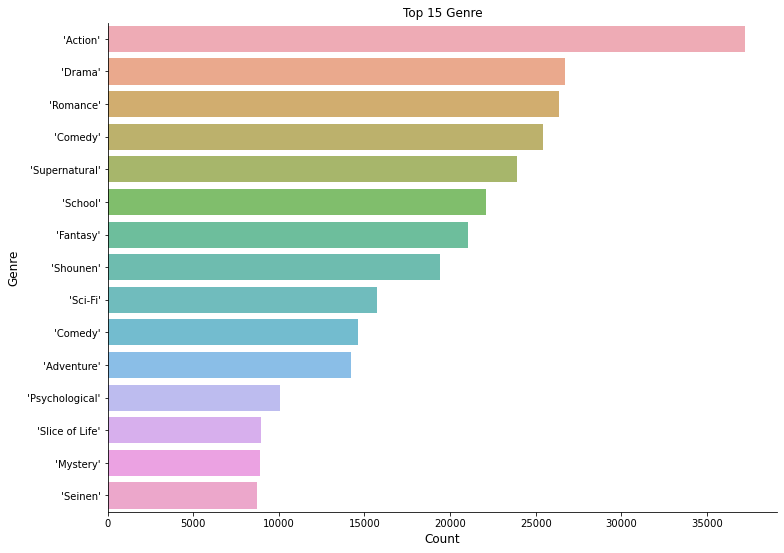

In [64]:
plt.figure(figsize=(12,9))
sns.barplot(y=genre_count[:15].index, x=genre_count[:15].values, alpha=0.8, orient='h')
plt.title('Top 15 Genre')
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Count', fontsize=12)
sns.despine(bottom=False)
plt.show()

### Based on rating website and user

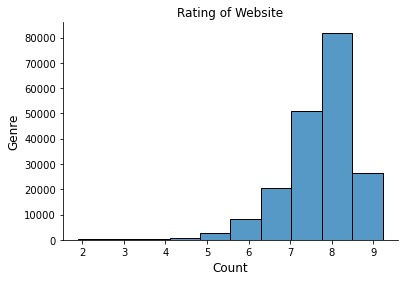

In [81]:
sns.histplot(anime_fulldata['rating'], bins=10)
plt.title('Rating of Website')
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Count', fontsize=12)
sns.despine(bottom=False)

In [95]:
count_user_rating = anime_fulldata['user_rating'].value_counts().sort_index()

In [103]:
count_user_rating

1      3563
2      3815
3      7204
4      7537
5     11154
6     16497
7     25826
8     34814
9     39695
10    42007
Name: user_rating, dtype: int64

/home/shandytp/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


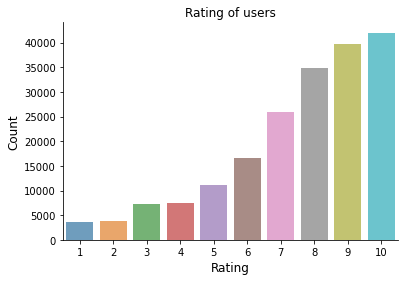

In [102]:
sns.barplot(count_user_rating.index, count_user_rating.values, alpha=0.7)
plt.title('Rating of users')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
sns.despine(bottom=False)
plt.show()

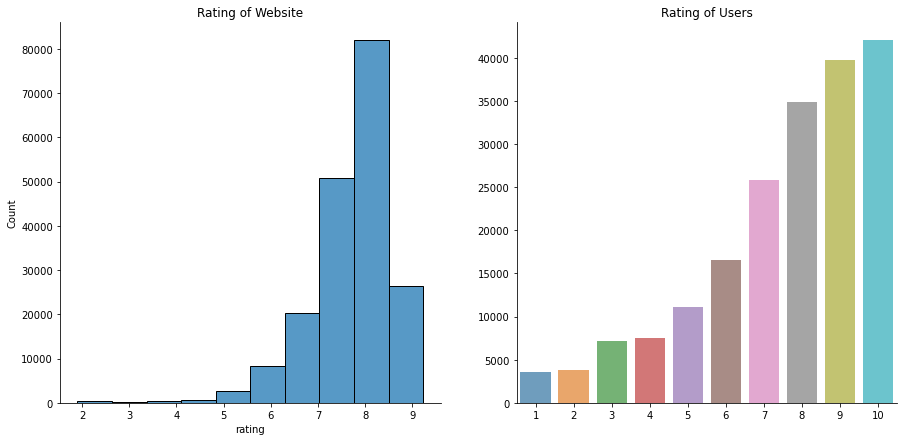

In [110]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
sns.histplot(anime_fulldata['rating'], bins=10)
plt.title('Rating of Website')
sns.despine(bottom=False)
plt.subplot(1,2,2)
sns.barplot(count_user_rating.index, count_user_rating.values, alpha=0.7)
plt.title('Rating of Users')
sns.despine(bottom=False)

plt.show()

## Anime Recommendation based on Popularity

`.count()` vs `.size()` : https://stackoverflow.com/a/54364400

In [114]:
anime_fulldata.groupby('title').size().sort_values(ascending=False)

title
Death Note                                                                   1708
Steins;Gate                                                                  1558
Kimi no Na wa.                                                               1436
Sword Art Online                                                             1292
Fullmetal Alchemist: Brotherhood                                             1274
                                                                             ... 
Seikon no Qwaser Picture Drama                                                  1
Heartcatch Precure! Movie: Hana no Miyako de Fashion Show... Desu ka!?          1
Hedler no Yama                                                                  1
Hei Mao Jing Zhang                                                              1
Shin Koihime†Musou: Otome Tairan - Gakuensai da yo! Zenin Shuugou no Koto       1
Length: 8113, dtype: int64

In [115]:
count_title = anime_fulldata.groupby('title').size().sort_values(ascending=False)

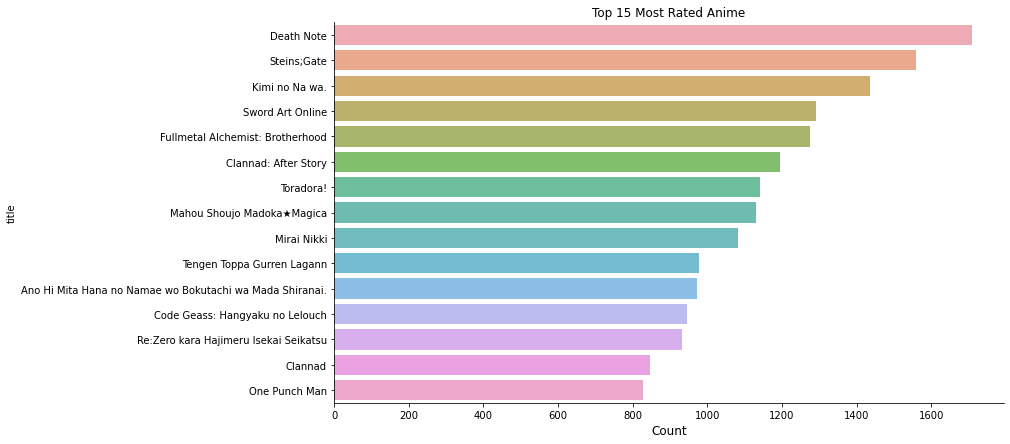

In [124]:
plt.figure(figsize=(12,7))
sns.barplot( x=count_title[:15].values, y=count_title[:15].index, alpha=0.8)
plt.title('Top 15 Most Rated Anime')
plt.xlabel('Count', fontsize=12)
sns.despine(bottom=False)

# Besok kita coba pake recommender system collaborative and content based 